## Visualize Cell Types (CT) by Cell Type Annotation Tool (CTann)

## Goals

Build these visualizations:

1. Stacked bar graph with CTs on x, number of cells on y, stacked by CTann, for lung datasets in HRApop
2. Bar graph that shows agreement between CTann

## Install and import libraries

In [105]:
%pip install requests pandas seaborn matplotlib

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


## Global variables

In [106]:
hra_pop_version = 'v0.11.1'

# adjust vis
plt.rcParams['figure.figsize'] = (17, 9)

# Set global font sizes using rcParams
plt.rcParams.update({
    "axes.titlesize": 20,    # Font size for plot titles
    "axes.labelsize": 13,    # Font size for x and y labels
    "xtick.labelsize": 11,   # Font size for x-axis tick labels
    "ytick.labelsize": 11,  # Font size for y-axis tick labels
    "legend.fontsize": 13,
    "legend.title_fontsize": 15
})

## Load data

In [107]:
#  A table with CT by CTann tool:
df_lung_ctann_cell_summaries= pd.read_csv(f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/atlas-ad-hoc/lung-ctann-cell-summaries.csv')
df_lung_ctann_cell_summaries

,tool,cell_id,cell_label,count,avg_percentage_of_total
0,azimuth,http://purl.obolibrary.org/obo/CL_4028002,EC general capillary,1067664,0.183314
1,azimuth,http://purl.obolibrary.org/obo/CL_0002062,AT1,692194,0.149474
2,azimuth,http://purl.obolibrary.org/obo/CL_0002063,AT2,330530,0.150459
3,azimuth,http://purl.obolibrary.org/obo/CL_0002145,Multiciliated (non-nasal),290708,0.048467
4,azimuth,http://purl.obolibrary.org/obo/CL_0000624,CD4 T cells,202292,0.046190
...,...,...,...,...,...
141,popv,http://purl.obolibrary.org/obo/CL_0017000,pulmonary ionocyte,56,0.000247
142,popv,http://purl.obolibrary.org/obo/CL_0000784,plasmacytoid dendritic cell,42,0.000483
143,popv,http://purl.obolibrary.org/obo/CL_0000071,blood vessel endothelial cell,18,0.000174
144,popv,http://purl.obolibrary.org/obo/CL_0000192,smooth muscle cell,16,0.001355


In [108]:
#  for vis 2
df_lung_dataset_cell_summaries_by_ctann = pd.read_csv(f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/atlas-ad-hoc/lung-dataset-cell-summaries-by-ctann.csv')
df_lung_dataset_cell_summaries_by_ctann

,dataset,tool,cell_id,cell_label,count,percentage_of_total
0,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0002063,AT2,838,0.168612
1,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0002062,AT1,740,0.148893
2,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0000583,Alveolar macrophages,697,0.140241
3,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_4028002,EC general capillary,473,0.095171
4,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_4028004,Alveolar fibroblasts,470,0.094567
...,...,...,...,...,...,...
5500,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_2000016,lung microvascular endothelial cell,4,0.001188
5501,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0001050,"effector CD8-positive, alpha-beta T cell",4,0.001188
5502,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0002393,intermediate monocyte,3,0.000891
5503,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0002062,type I pneumocyte,2,0.000594


## Visualize

### Grouped Bar Graph

In [109]:
# Melt to long format
df_long_bar = df_lung_ctann_cell_summaries.melt(
    id_vars=['cell_label', 'count', 'tool'], var_name='type', value_name='Value')
df_long_bar

,cell_label,count,tool,type,Value
0,EC general capillary,1067664,azimuth,cell_id,http://purl.obolibrary.org/obo/CL_4028002
1,AT1,692194,azimuth,cell_id,http://purl.obolibrary.org/obo/CL_0002062
2,AT2,330530,azimuth,cell_id,http://purl.obolibrary.org/obo/CL_0002063
3,Multiciliated (non-nasal),290708,azimuth,cell_id,http://purl.obolibrary.org/obo/CL_0002145
4,CD4 T cells,202292,azimuth,cell_id,http://purl.obolibrary.org/obo/CL_0000624
...,...,...,...,...,...
287,pulmonary ionocyte,56,popv,avg_percentage_of_total,0.000247
288,plasmacytoid dendritic cell,42,popv,avg_percentage_of_total,0.000483
289,blood vessel endothelial cell,18,popv,avg_percentage_of_total,0.000174
290,smooth muscle cell,16,popv,avg_percentage_of_total,0.001355


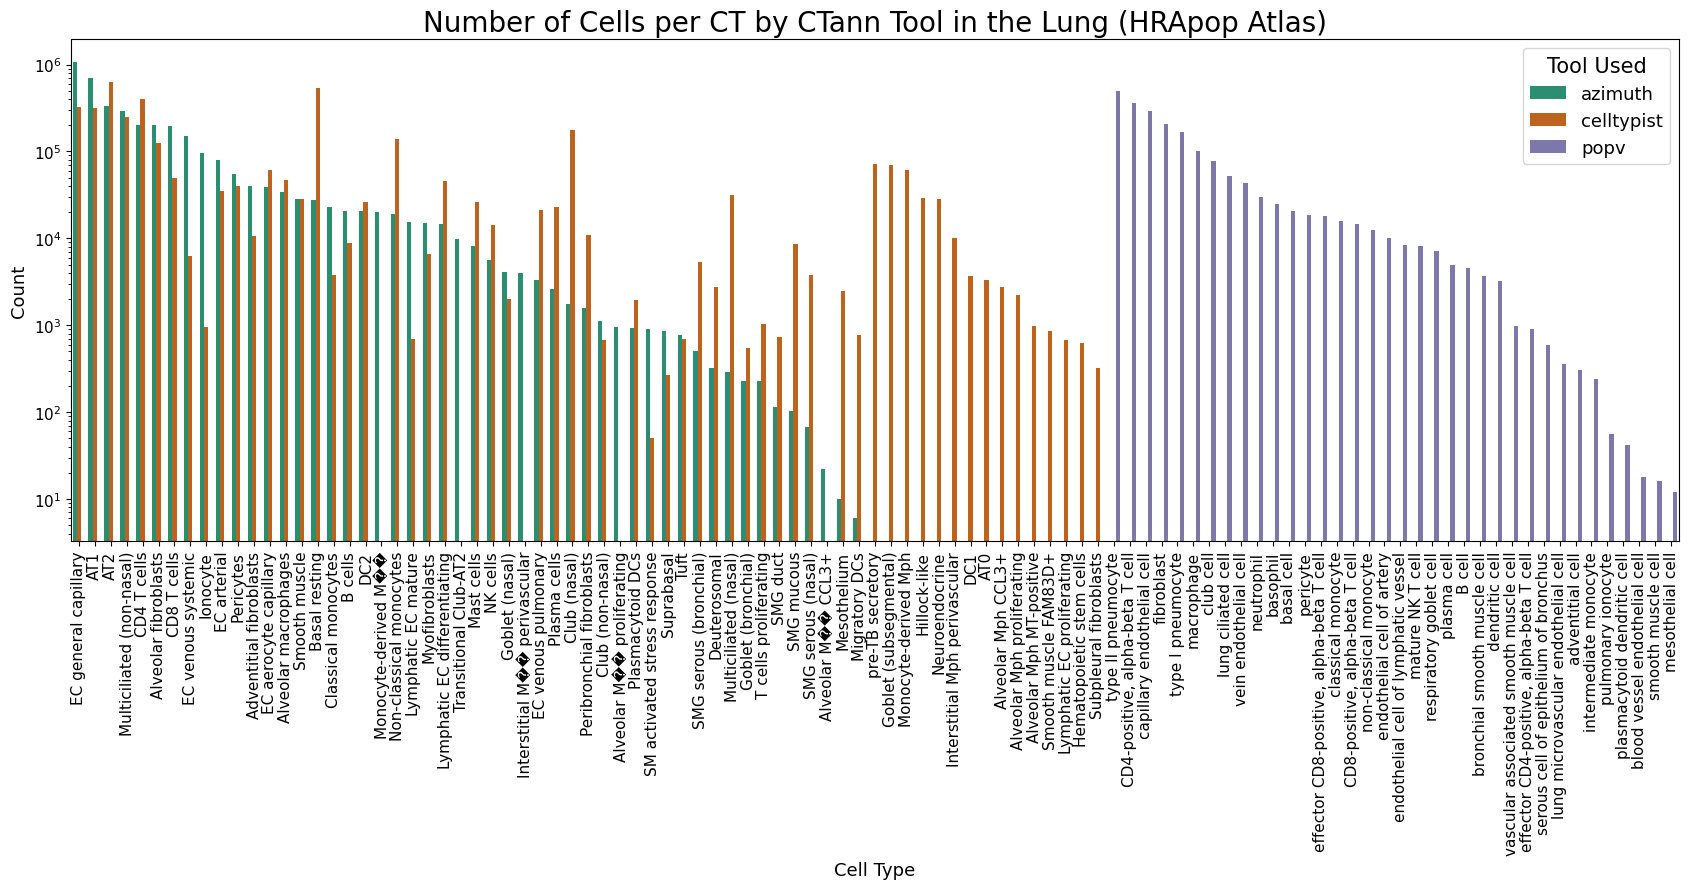

In [141]:
# Plot grouped bars
g = sns.barplot(data=df_long_bar, x='cell_label',
                y='count', hue='tool', palette='Dark2')

# Rotate x-axis labels
plt.xticks(rotation=90)

# log scale
plt.yscale('log')

# set axis labels
plt.xlabel('Cell Type')
plt.ylabel('Count')

# set title
plt.title('Number of Cells per CT by CTann Tool in the Lung (HRApop Atlas)')

# Change legend title
plt.legend(title="Tool Used")

# Show plot
plt.tight_layout()
plt.show()

### Agreement between CTann

In [111]:
df_long_agreement = df_lung_dataset_cell_summaries_by_ctann.melt(
    id_vars=['dataset', 'cell_label'], var_name='Type', value_name='Value')
df_long_agreement

,dataset,cell_label,Type,Value
0,https://api.cellxgene.cziscience.com/dp/v1/col...,AT2,tool,azimuth
1,https://api.cellxgene.cziscience.com/dp/v1/col...,AT1,tool,azimuth
2,https://api.cellxgene.cziscience.com/dp/v1/col...,Alveolar macrophages,tool,azimuth
3,https://api.cellxgene.cziscience.com/dp/v1/col...,EC general capillary,tool,azimuth
4,https://api.cellxgene.cziscience.com/dp/v1/col...,Alveolar fibroblasts,tool,azimuth
...,...,...,...,...
22015,https://entity.api.sennetconsortium.org/entiti...,lung microvascular endothelial cell,percentage_of_total,0.001188
22016,https://entity.api.sennetconsortium.org/entiti...,"effector CD8-positive, alpha-beta T cell",percentage_of_total,0.001188
22017,https://entity.api.sennetconsortium.org/entiti...,intermediate monocyte,percentage_of_total,0.000891
22018,https://entity.api.sennetconsortium.org/entiti...,type I pneumocyte,percentage_of_total,0.000594


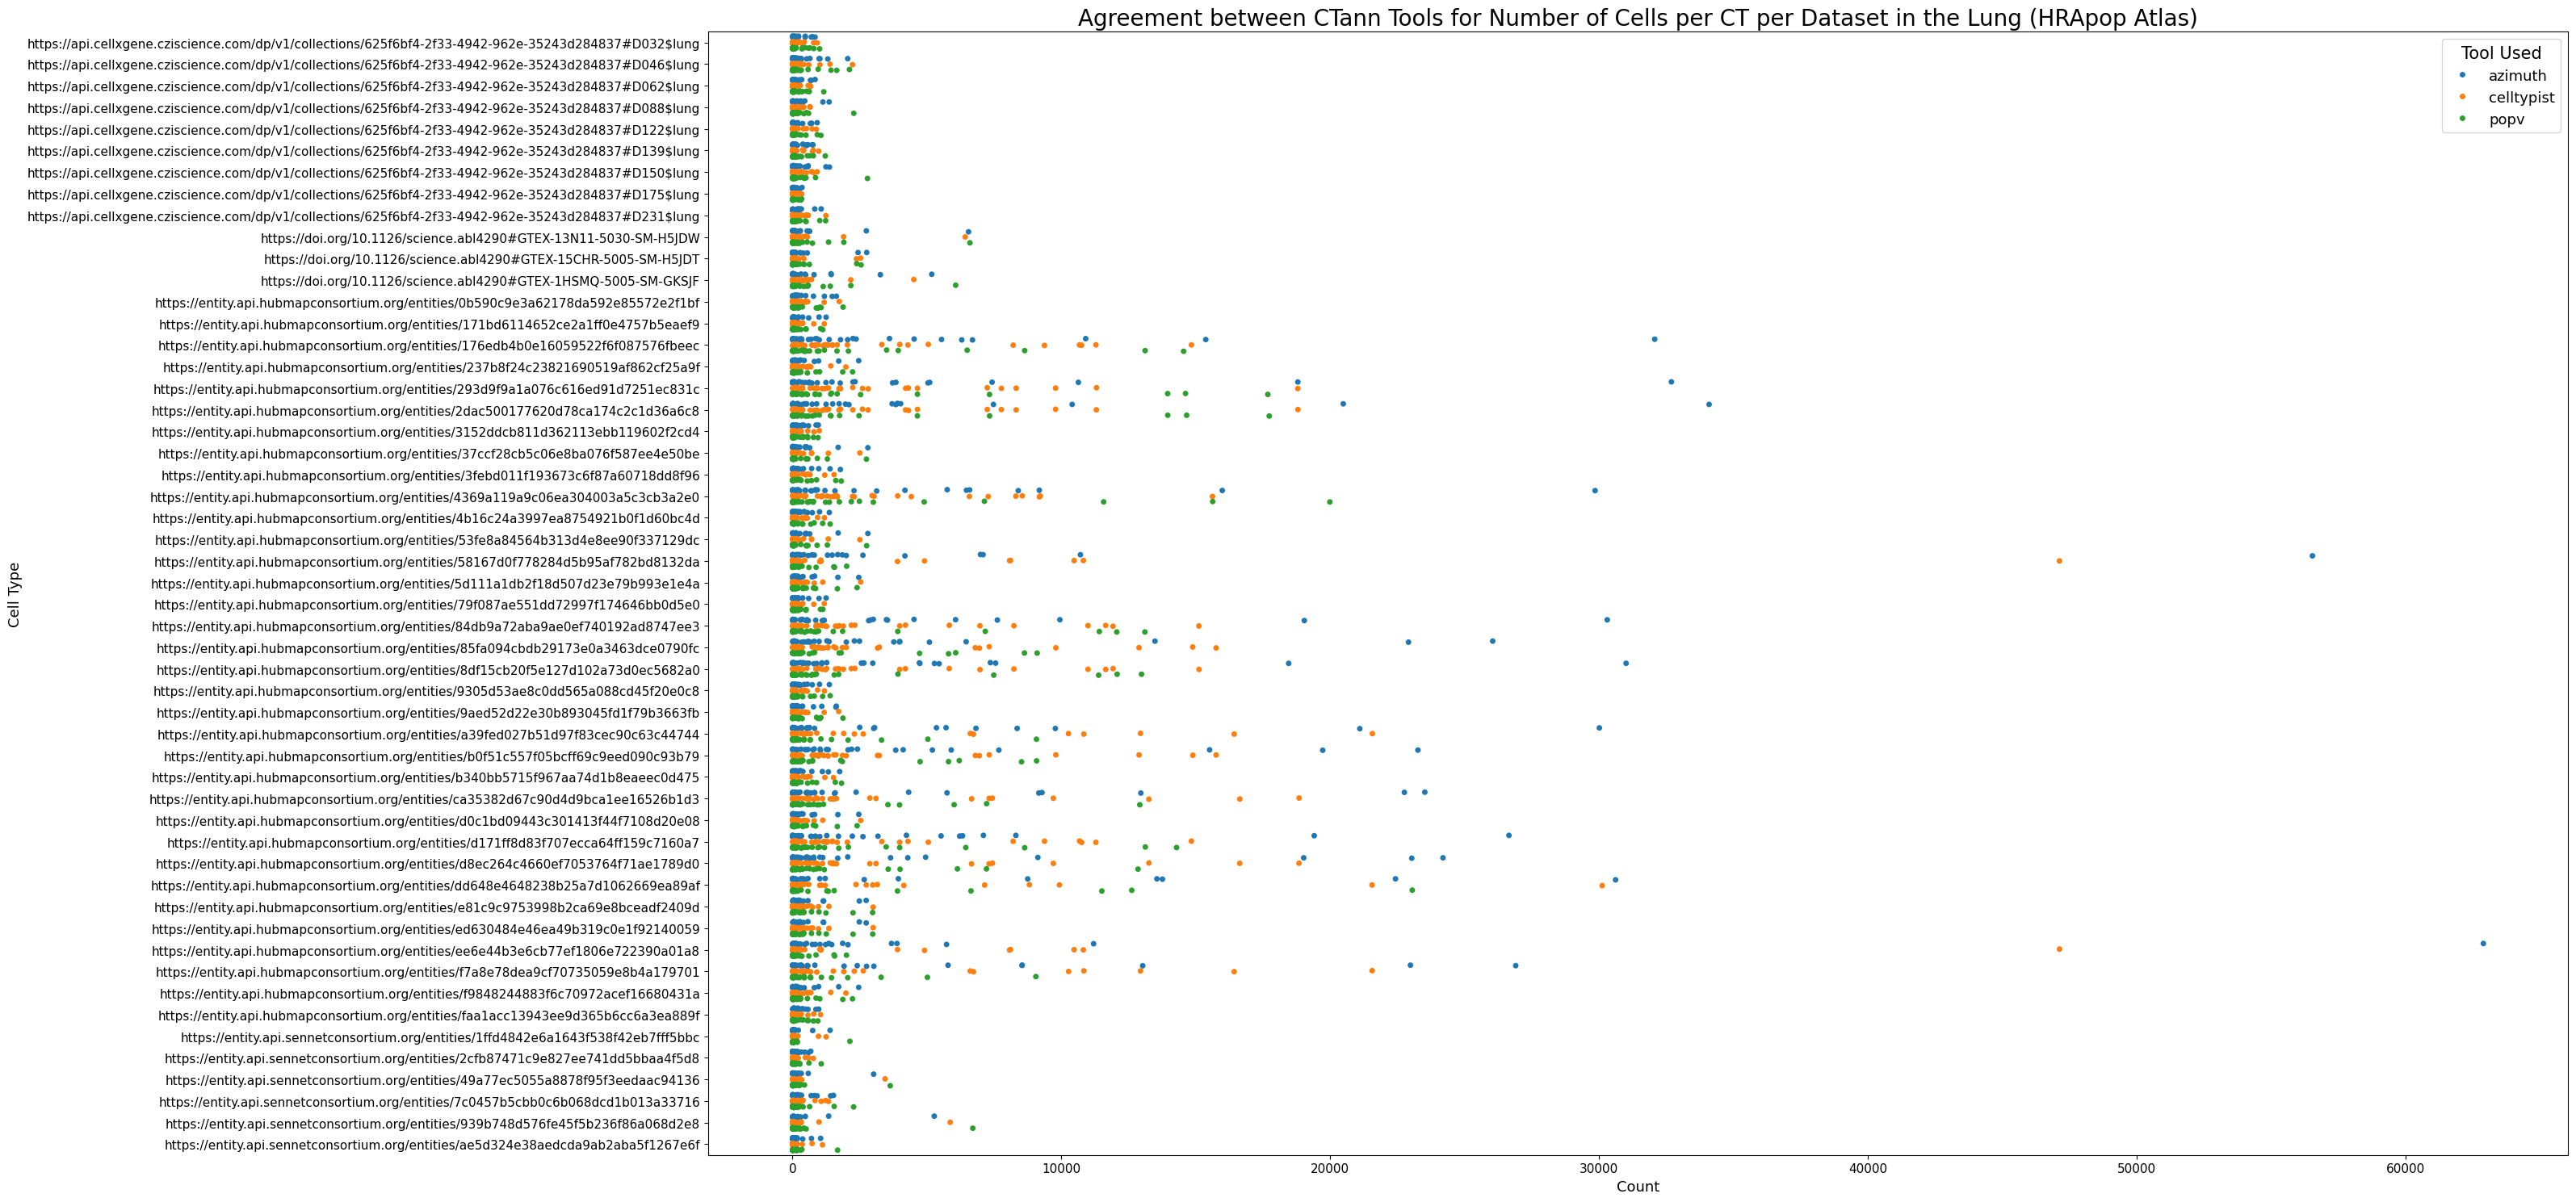

In [126]:
plt.figure(figsize=(32, 15))  # set width, height

# Basic dot plot with categories on y-axis
# jitter=True helps separate overlapping dots
sns.stripplot(data=df_lung_dataset_cell_summaries_by_ctann,
              x='count', y='dataset',hue='tool',  jitter=True, dodge=True)

# set axis labels
plt.xlabel('Count')
plt.ylabel('Cell Type')

# set title
plt.title('Agreement between CTann Tools for Number of Cells per CT per Dataset in the Lung (HRApop Atlas)')

# Change legend title
plt.legend(title="Tool Used")

# Show plot
plt.tight_layout()
plt.show()

In [144]:
# Function to calculate agreement
def calculate_agreement(group):
    print(group)
    # max - min difference
    count_range = group['count'].max() - group['count'].min()
    # Normalize to [0, 1]
    return 1 - (count_range / (group['count'].max() if group['count'].max() != 0 else 1))


# Use transform() to return a scalar value for each group
df_lung_dataset_cell_summaries_by_ctann['agreement'] = df_lung_dataset_cell_summaries_by_ctann.groupby(['dataset', 'cell_label'])[
    'count'].transform(calculate_agreement)

df_lung_dataset_cell_summaries_by_ctann

40    80
Name: (https://api.cellxgene.cziscience.com/dp/v1/collections/625f6bf4-2f33-4942-962e-35243d284837#D032$lung, AT0), dtype: int64


KeyError: 'count'